<a href="https://colab.research.google.com/github/imswabhab/Projects-ML/blob/master/SinglePerceptronVsLinerRegressorComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')

In [0]:
data= raw_data.copy()

In [5]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
data.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


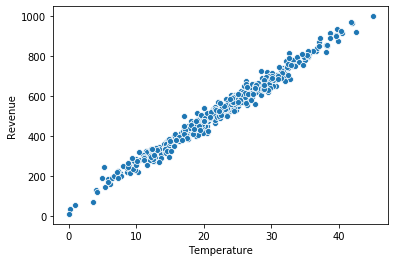

In [9]:
#visualising the dataset
sns.scatterplot(data['Temperature'],data['Revenue'])

In [0]:
#as the dataset is small only consisting of 30 enteries we will not divide the dataset
x = data['Temperature']
y = data['Revenue']

In [11]:
#building the model

model =tf.keras.Sequential()
#building a single neuron
model.add(tf.keras.layers.Dense(units = 1, input_shape =[1]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(tf.keras.optimizers.Adam(0.5),loss = 'mean_squared_error')

In [14]:
epoch_hist= model.fit(x,y,epochs=500)

Train on 500 samples
Epoch 1/500
500/500 [==============================] - 0s 944us/sample - loss: 222725.1217
Epoch 2/500
500/500 [==============================] - 0s 48us/sample - loss: 83654.9515
Epoch 3/500
500/500 [==============================] - 0s 42us/sample - loss: 21242.8468
Epoch 4/500
500/500 [==============================] - 0s 41us/sample - loss: 3092.9882
Epoch 5/500
500/500 [==============================] - 0s 47us/sample - loss: 697.3991
Epoch 6/500
500/500 [==============================] - 0s 43us/sample - loss: 728.2319
Epoch 7/500
500/500 [==============================] - 0s 40us/sample - loss: 709.4909
Epoch 8/500
500/500 [==============================] - 0s 39us/sample - loss: 681.3534
Epoch 9/500
500/500 [==============================] - 0s 41us/sample - loss: 679.3202
Epoch 10/500
500/500 [==============================] - 0s 42us/sample - loss: 677.8758
Epoch 11/500
500/500 [==============================] - 0s 48us/sample - loss: 678.0106
Epoch 12/50

In [15]:
epoch_hist.history.keys()

dict_keys(['loss'])

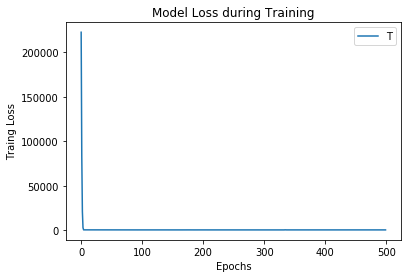

In [16]:
#evaluating the model
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Traing Loss')
plt.legend('Traing Loss')

In [17]:
model.get_weights()

[array([[21.550716]], dtype=float32), array([44.8671], dtype=float32)]

In [0]:
#using regression kit in sklearn
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)


In [19]:
#using linearmodelregressor
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = True)
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#checking the coefficient
reg.coef_

array([[21.44362551]])

In [21]:
#checking the slope
reg.intercept_


array([44.83126709])

Text(0, 0.5, 'Revenue')

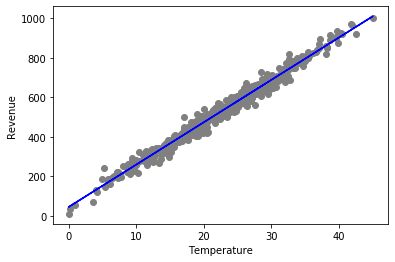

In [23]:
plt.scatter(x,y, color = 'gray')
plt.plot(x,reg.predict(x),color = 'blue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')